# Random Forest Regressor

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg

In [3]:
from setting_features import *

In [4]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

**Random Forest** is a tree based algorithm. It is an ensemble of multiple random trees of different kinds. The final value of the model is the average of all the prediction/estimates created by each individual tree. Random Forest is an ensemble model that is a consensus of many uncorrelated Decision Trees.



The Decision Trees can become uncorrelated in 2 ways:

1. You have a large enough dataset size where you can sample unique parts of your data to each decision tree. This is not as popular and often requires a huge amount of data.


2. You can leverage a technique called sampling with replacement. Sampling with replacement means that a sample that is drawn from a population is returned to the population before the next sample is drawn.

**Steps:**

i. Create differents uncorrelated trees.

ii. The final prediction is the average/majority of all the trees.

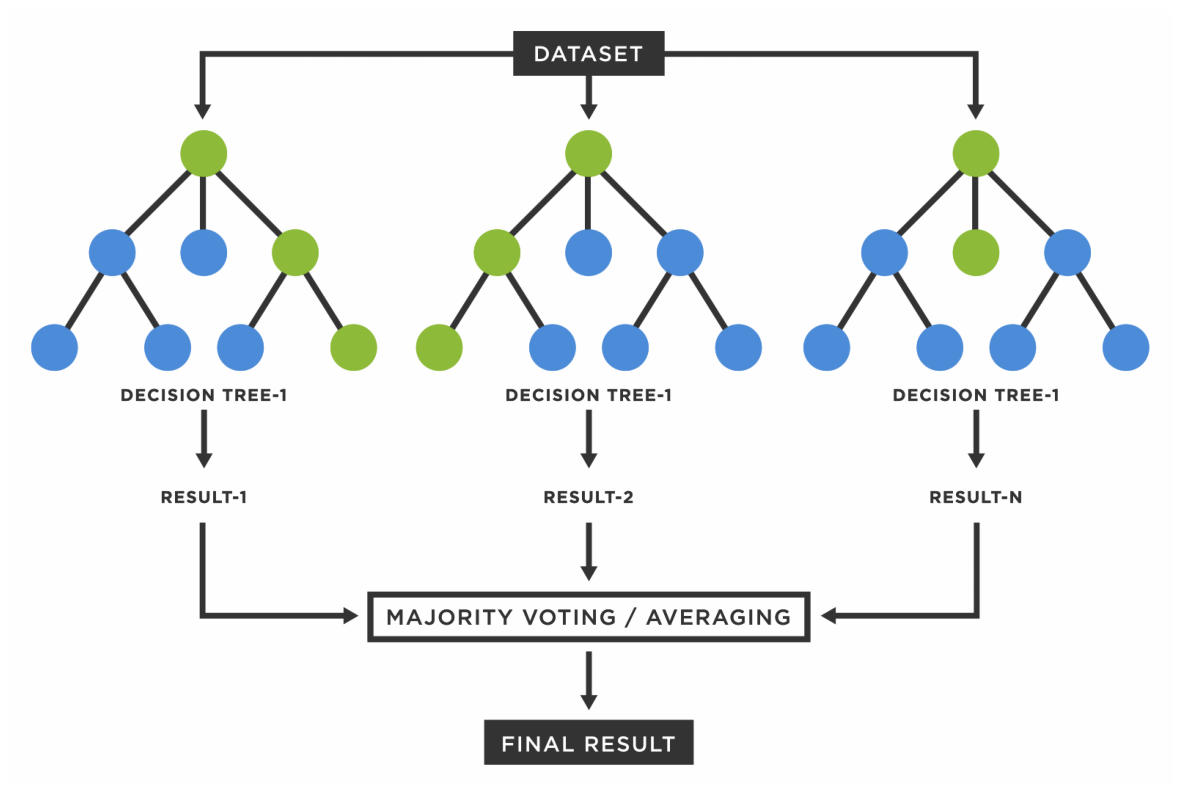

In [5]:
display_img('Random_Forest.png', 15, 15)

**Considerations:**

- The trees aren't sensitive to scaling.

In [6]:
start = time.time()

# 1. Preprocessing

### i. Read Dataframe

In [7]:
df = pd.read_csv('Life Expectancy Data.csv')

In [8]:
X_cols = var_dict['cat_oh'] + var_dict['num_mean']
y_col = ['Life expectancy ']

### ii. Drop 'y' NaNs

In [9]:
df = df[df[y_col[0]].notna()]

### iii. Split

In [10]:
# External

ctr_test_hor_ext = ['Argentina', 'Bolivia (Plurinational State of)', 'Brazil', 'Peru', 'Uruguay']

ctr_test_ver_ext = ['Chile', 'Colombia', 'Ecuador', 'Paraguay', 'Venezuela (Bolivarian Republic of)']

# Internal

ctr_test_hor_int = ['Dominica', 'Mauritius', 'Netherlands', 'Armenia', 'Kazakhstan', 'Russian Federation', 'Ukraine', 'Bangladesh', 'India', 'Somalia']

ctr_test_ver_int = ['Afghanistan', 'New Zealand', 'Niger', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Philippines']

# Validation

ctr_val_hor = ['Albania', 'Qatar', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Nicaragua', 'Poland', 'Portugal', 'Republic of Korea', 'Senegal', 'Republic of Moldova', 
               'Romania', 'Rwanda', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Morocco', 'Montenegro']

ctr_val_ver = ['Algeria', 'Luxembourg', 'Sierra Leone', 'Seychelles', 'Serbia', 'Saudi Arabia', 'Mongolia', 'Micronesia (Federated States of)', 'Mexico',
               'Mauritania', 'Malta', 'Mali', 'Maldives', 'Malaysia', 'Malawi', 'Madagascar', 'Lithuania', 'Slovakia', 'Libya', 'Liberia']

# All validation and test countries

all_ctr = ctr_test_hor_ext + ctr_test_ver_ext + ctr_test_hor_int + ctr_test_ver_int + ctr_val_hor + ctr_val_ver 

In [11]:
# External

df_test_hor_ext = df[(df['Country'].isin(ctr_test_hor_ext)) & (df['Year'] != 2015)]
df_test_ver_ext = df[(df['Country'].isin(ctr_test_ver_ext)) & (df['Year'] == 2015)]

# Internal

df_test_hor_int = df[(df['Country'].isin(ctr_test_hor_int)) & (df['Year'] != 2015)]
df_test_ver_int = df[(df['Country'].isin(ctr_test_ver_int)) & (df['Year'] == 2015)]

# Validation

df_val_hor = df[(df['Country'].isin(ctr_val_hor)) & (df['Year'] != 2015) & (df['Year'] != 2014)]
df_val_ver = df[(df['Country'].isin(ctr_val_ver)) & (df['Year'] == 2014)]

# Train

df_train = df[(~df['Country'].isin(all_ctr)) & (df['Year'] != 2015) & (df['Year'] != 2014)]

In [12]:
# External

X_test_hor_ext = df_test_hor_ext[X_cols]
y_test_hor_ext = df_test_hor_ext[y_col]

X_test_ver_ext = df_test_ver_ext[X_cols]
y_test_ver_ext = df_test_ver_ext[y_col]

# Internal

X_test_hor_int = df_test_hor_int[X_cols]
y_test_hor_int = df_test_hor_int[y_col]

X_test_ver_int = df_test_ver_int[X_cols]
y_test_ver_int = df_test_ver_int[y_col]

# Validation

X_val_hor = df_val_hor[X_cols]
y_val_hor = df_val_hor[y_col]

X_val_ver = df_val_ver[X_cols]
y_val_ver = df_val_ver[y_col]

# Train

X_train = df_train[X_cols]
y_train = df_train[y_col]

### iv. Fit preprocess

In [13]:
from preprocessing import *

In [14]:
transformers_fit = get_fit_transformers(var_dict, X_train)

In [15]:
# Train

y_train = y_train.reset_index()
y_train = y_train.drop(columns = ['index'])

# Validation

y_val_hor = y_val_hor.reset_index()
y_val_hor = y_val_hor.drop(columns = ['index'])

y_val_ver = y_val_ver.reset_index()
y_val_ver = y_val_ver.drop(columns = ['index'])

# Test

y_test_hor_int = y_test_hor_int.reset_index()
y_test_hor_int = y_test_hor_int.drop(columns = ['index'])

y_test_ver_int = y_test_ver_int.reset_index()
y_test_ver_int = y_test_ver_int.drop(columns = ['index'])

y_test_hor_ext = y_test_hor_ext.reset_index()
y_test_hor_ext = y_test_hor_ext.drop(columns = ['index'])

y_test_ver_ext = y_test_ver_ext.reset_index()
y_test_ver_ext = y_test_ver_ext.drop(columns = ['index'])

In [16]:
# Train

X_train = transform_datasets(transformers_fit, var_dict, X_train)

# Validation

X_val_hor = transform_datasets(transformers_fit, var_dict, X_val_hor)

X_val_ver = transform_datasets(transformers_fit, var_dict, X_val_ver)

# Test

X_test_hor_int = transform_datasets(transformers_fit, var_dict, X_test_hor_int)

X_test_ver_int = transform_datasets(transformers_fit, var_dict, X_test_ver_int)

X_test_hor_ext = transform_datasets(transformers_fit, var_dict, X_test_hor_ext)

X_test_ver_ext = transform_datasets(transformers_fit, var_dict, X_test_ver_ext)

### v. Train model (with Fine Tunning)

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
N_est_max = 100
M_depth_max = 10

In [19]:
N_est = [i for i in range(1, N_est_max + 1)]
M_depth = [j for j in range(1, M_depth_max + 1)]

In [20]:
all_mape_train = []
all_mape_val = []
all_params = []


for n_est in N_est:

    print('N estimators: ', n_est)

    for m_depth in M_depth:

        reg = RandomForestRegressor(n_estimators = n_est, max_depth = m_depth, random_state = 0)

        reg = reg.fit(X_train, y_train)

        y_train_pred = reg.predict(X_train)
        y_val_hor_pred = reg.predict(X_val_hor)
        y_val_ver_pred = reg.predict(X_val_ver)

        mape_train = round(abs((y_train_pred - y_train['Life expectancy '])/y_train['Life expectancy ']).mean()*100, 2)
        mape_val_hor = round(abs((y_val_hor_pred - y_val_hor['Life expectancy '])/y_val_hor['Life expectancy ']).mean()*100, 2)
        mape_val_ver = round(abs((y_val_ver_pred - y_val_ver['Life expectancy '])/y_val_ver['Life expectancy ']).mean()*100, 2)
        mape_val = (mape_val_hor + mape_val_ver)/2

        all_mape_train.append(mape_train)
        all_mape_val.append(mape_val)
        all_params.append([n_est, m_depth])
    
    print('-'*70)

all_mape_train = np.array(all_mape_train)
all_mape_val = np.array(all_mape_val)
all_params = np.array(all_params)

N estimators:  1
----------------------------------------------------------------------
N estimators:  2
----------------------------------------------------------------------
N estimators:  3
----------------------------------------------------------------------
N estimators:  4
----------------------------------------------------------------------
N estimators:  5
----------------------------------------------------------------------
N estimators:  6
----------------------------------------------------------------------
N estimators:  7
----------------------------------------------------------------------
N estimators:  8
----------------------------------------------------------------------
N estimators:  9
----------------------------------------------------------------------
N estimators:  10
----------------------------------------------------------------------
N estimators:  11
----------------------------------------------------------------------
N estimators:  12
------------

In [21]:
mape_train_opt = all_mape_train[all_mape_val == all_mape_val.min()][0]
mape_val_opt = all_mape_val[all_mape_val == all_mape_val.min()][0]
N_est_opt, M_depth_opt = all_params[all_mape_val == all_mape_val.min()][0]

In [22]:
print('Train MAPE:', mape_train_opt)
print('Val MAPE:', mape_val_opt)
print('N est opt:', N_est_opt)
print('M depth opt:', M_depth_opt)

Train MAPE: 1.09
Val MAPE: 3.3449999999999998
N est opt: 94
M depth opt: 9


### vi. Train definitive model

In [23]:
reg = RandomForestRegressor(n_estimators = N_est_opt, max_depth = M_depth_opt, random_state = 0)

In [24]:
reg = reg.fit(X_train, y_train)

### vii. Report of metrics

In [25]:
# Train

y_train_pred = reg.predict(X_train)
mape_train = round(abs((y_train_pred - y_train['Life expectancy '])/y_train['Life expectancy ']).mean()*100, 2)

# Validation

y_val_hor_pred = reg.predict(X_val_hor)
mape_val_hor = round(abs((y_val_hor_pred - y_val_hor['Life expectancy '])/y_val_hor['Life expectancy ']).mean()*100, 2)

y_val_ver_pred = reg.predict(X_val_ver)
mape_val_ver = round(abs((y_val_ver_pred - y_val_ver['Life expectancy '])/y_val_ver['Life expectancy ']).mean()*100, 2)

# Test 

y_test_hor_int_pred = reg.predict(X_test_hor_int)
mape_test_hor_int = round(abs((y_test_hor_int_pred - y_test_hor_int['Life expectancy '])/y_test_hor_int['Life expectancy ']).mean()*100, 2)

y_test_ver_int_pred = reg.predict(X_test_ver_int)
mape_test_ver_int = round(abs((y_test_ver_int_pred - y_test_ver_int['Life expectancy '])/y_test_ver_int['Life expectancy ']).mean()*100, 2)

y_test_hor_ext_pred = reg.predict(X_test_hor_ext)
mape_test_hor_ext = round(abs((y_test_hor_ext_pred - y_test_hor_ext['Life expectancy '])/y_test_hor_ext['Life expectancy ']).mean()*100, 2)

y_test_ver_ext_pred = reg.predict(X_test_ver_ext)
mape_test_ver_ext = round(abs((y_test_ver_ext_pred - y_test_ver_ext['Life expectancy '])/y_test_ver_ext['Life expectancy ']).mean()*100, 2)

In [26]:
print('Train')

print('\n')

print('MAPE Train:', mape_train)

print('\n')

print('-'*70)

print('Validation')

print('\n')

print('MAPE Val Hor:', mape_val_hor)
print('MAPE Val Ver:', mape_val_ver)

print('\n')

print('-'*70)

print('Test')

print('\n')

print('MAPE Test Hor Int:', mape_test_hor_int)
print('MAPE Test Ver Int:', mape_test_ver_int)
print('MAPE Test Hor Ext:', mape_test_hor_ext)
print('MAPE Test Ver Ext:', mape_test_ver_ext)

print('\n')

print('-'*70)

Train


MAPE Train: 1.09


----------------------------------------------------------------------
Validation


MAPE Val Hor: 2.82
MAPE Val Ver: 3.87


----------------------------------------------------------------------
Test


MAPE Test Hor Int: 4.88
MAPE Test Ver Int: 3.52
MAPE Test Hor Ext: 2.25
MAPE Test Ver Ext: 1.3


----------------------------------------------------------------------


### viii. Patterns

In [27]:
X_test_hor_int['pred'] = y_test_hor_int
X_test_ver_int['pred'] = y_test_ver_int
X_test_hor_ext['pred'] = y_test_hor_ext
X_test_ver_ext['pred'] = y_test_ver_ext

In [28]:
df_patt = pd.concat([X_test_hor_int, X_test_ver_int, X_test_hor_ext, X_test_ver_ext], axis = 0)
df_patt = df_patt.reset_index()
df_patt = df_patt.drop(columns = ['index'])

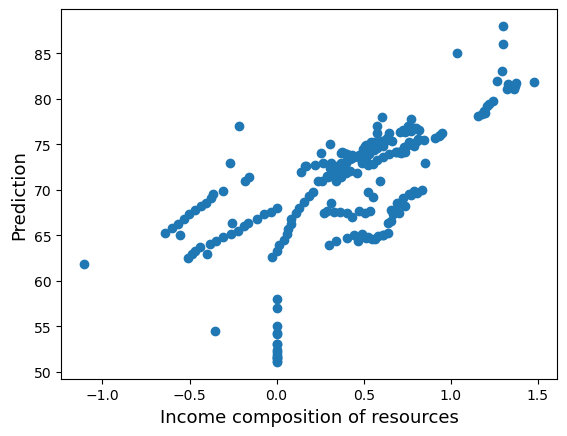

In [29]:
plt.scatter(df_patt['Income composition of resources'], df_patt['pred'])
plt.ylabel('Prediction', fontsize = 13)
plt.xlabel('Income composition of resources', fontsize = 13)
plt.show()

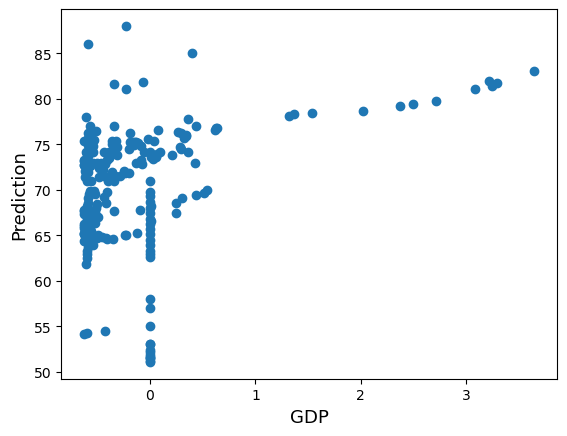

In [30]:
plt.scatter(df_patt['GDP'], df_patt['pred'])
plt.ylabel('Prediction', fontsize = 13)
plt.xlabel('GDP', fontsize = 13)
plt.show()

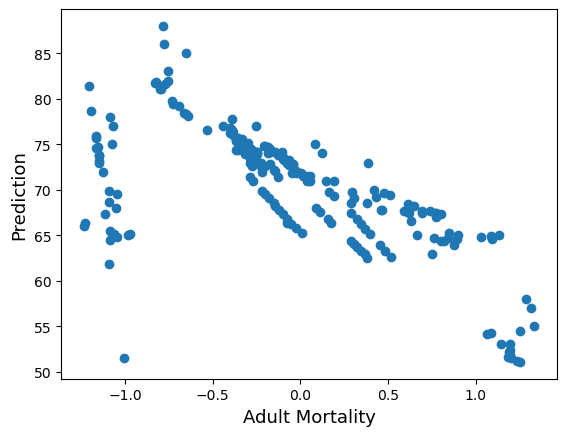

In [31]:
plt.scatter(df_patt['Adult Mortality'], df_patt['pred'])
plt.ylabel('Prediction', fontsize = 13)
plt.xlabel('Adult Mortality', fontsize = 13)
plt.show()

### ix. Feature Importance

In [32]:
fi = pd.DataFrame(zip(reg.feature_names_in_, reg.feature_importances_))
fi = fi.rename(columns = {0: 'Variable', 1: 'Importance'})
fi['Importance'] = fi['Importance']*100

fi = fi.sort_values(by = ['Importance'], ascending = False)
fi = fi.reset_index()
fi = fi.drop(columns = ['index'])

In [33]:
fi

,Variable,Importance
0,HIV/AIDS,65.491320
1,Income composition of resources,16.580311
2,Adult Mortality,10.332448
3,BMI,1.757724
4,Alcohol,1.442061
5,thinness 5-9 years,1.008697
6,Total expenditure,0.583334
7,under-five deaths,0.569230
8,Year,0.504531
9,Measles,0.335286


### x. Explainability

In [34]:
import shap

In [35]:
explainer = shap.TreeExplainer(reg)

In [36]:
shap_values = explainer.shap_values(df_patt[X_train.columns])

In [37]:
df_shap_values = pd.DataFrame(shap_values)
df_shap_values.columns = X_train.columns

**Importance Variable**

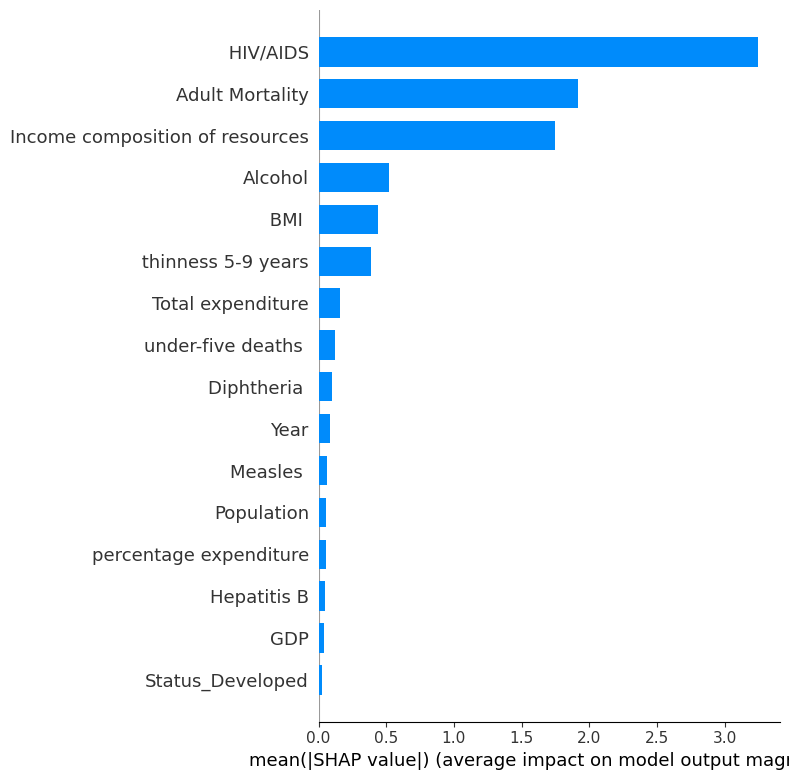

In [38]:
shap.summary_plot(shap_values, df_patt[X_train.columns], plot_type = "bar")

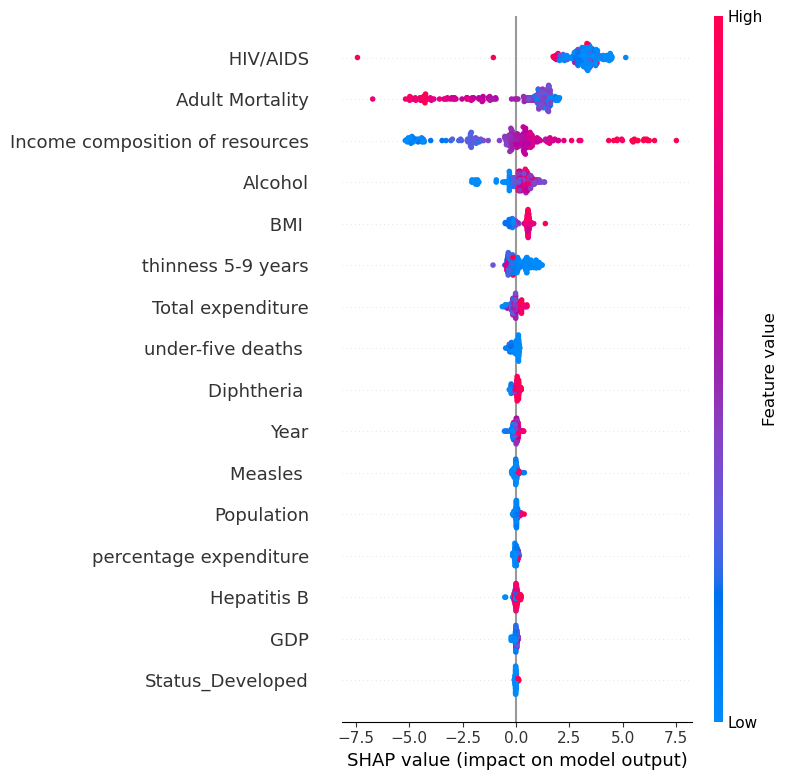

In [39]:
shap.summary_plot(shap_values, df_patt[X_train.columns])

In [40]:
df_shap_values['partial_sum_SHAP'] = df_shap_values.sum(axis = 1)

In [41]:
df_shap_values = df_shap_values[['partial_sum_SHAP']]

In [42]:
df_shap_values['pred_model'] = df_patt['pred']

**Sum of SHAP Values**

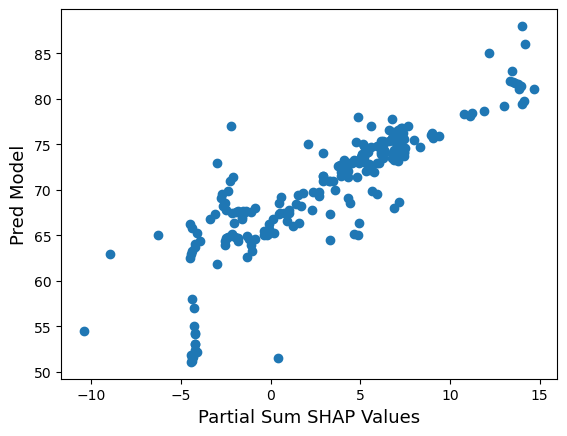

In [43]:
plt.scatter(df_shap_values['partial_sum_SHAP'], df_shap_values['pred_model'])
plt.xlabel('Partial Sum SHAP Values', fontsize = 13)
plt.ylabel('Pred Model', fontsize = 13)
plt.show()

**SHAP dependency**

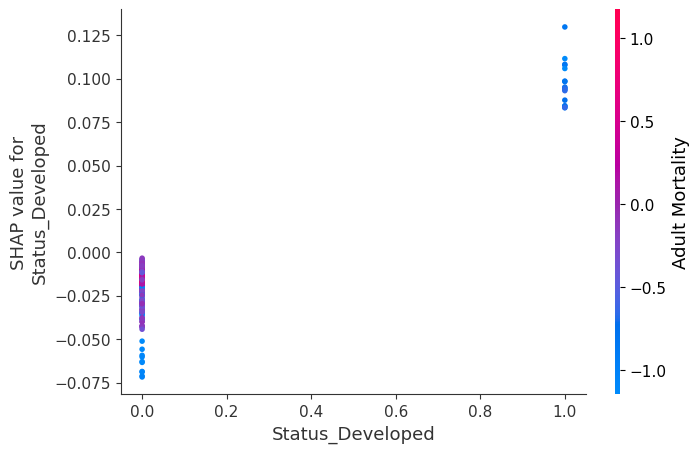

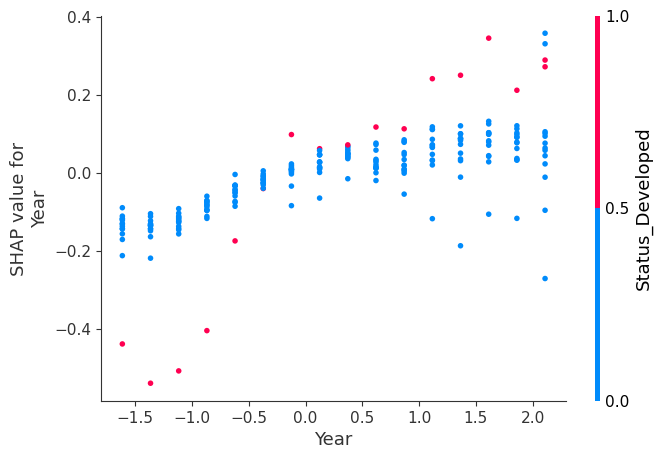

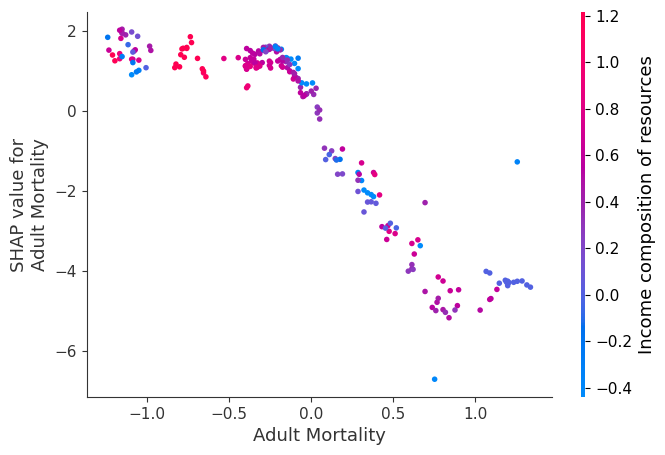

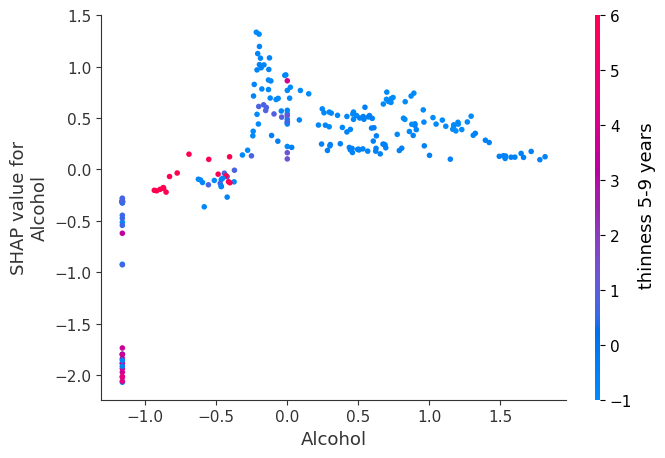

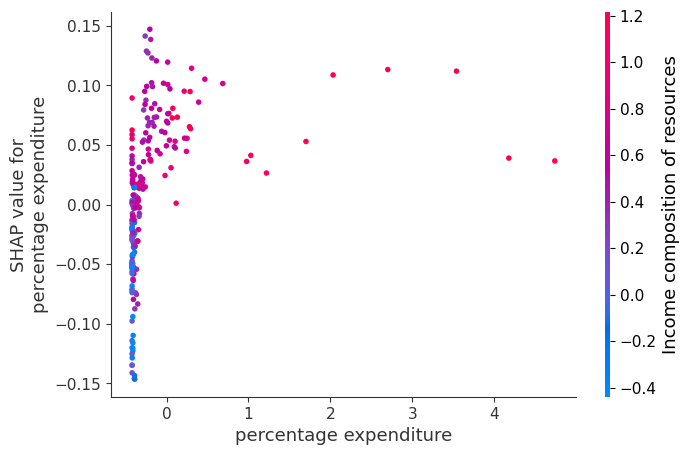

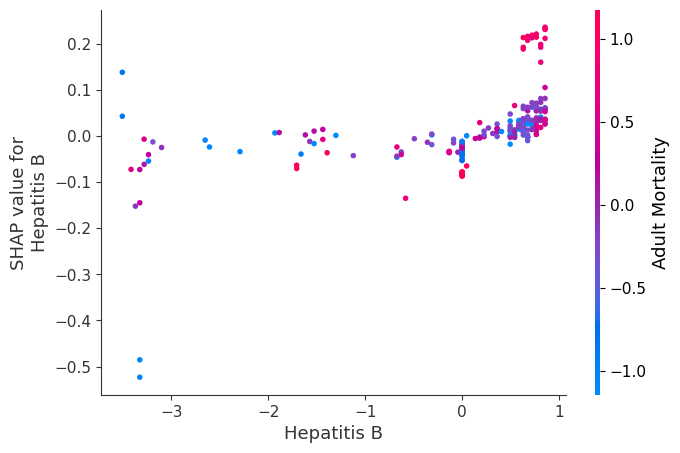

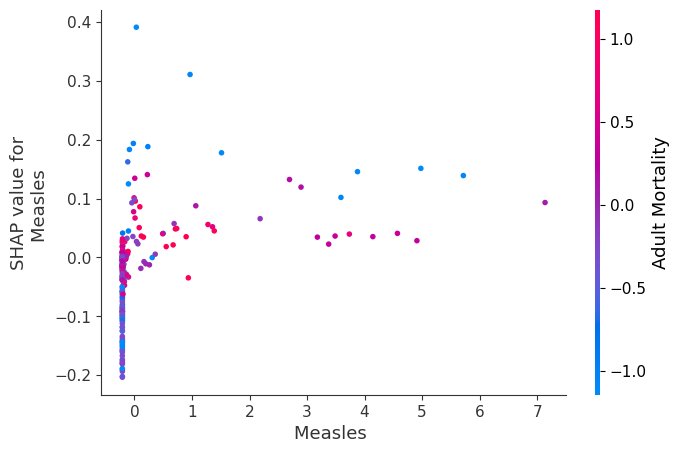

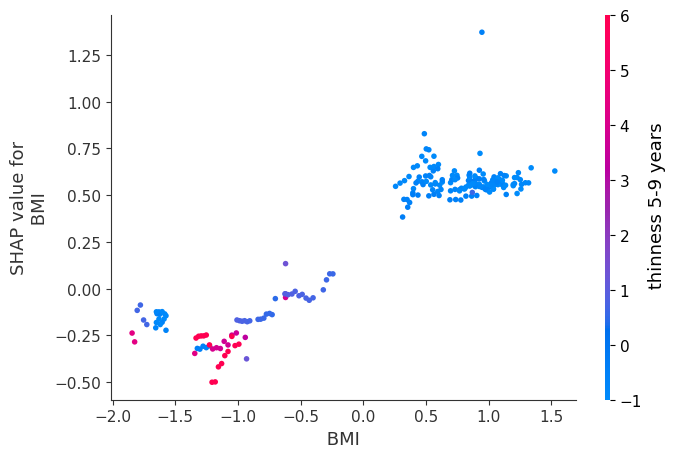

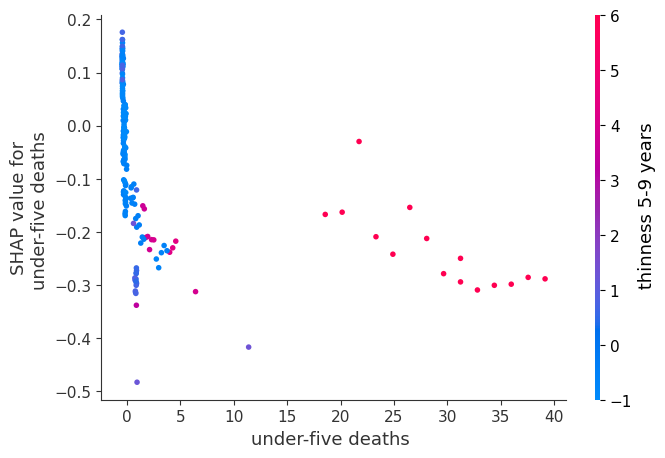

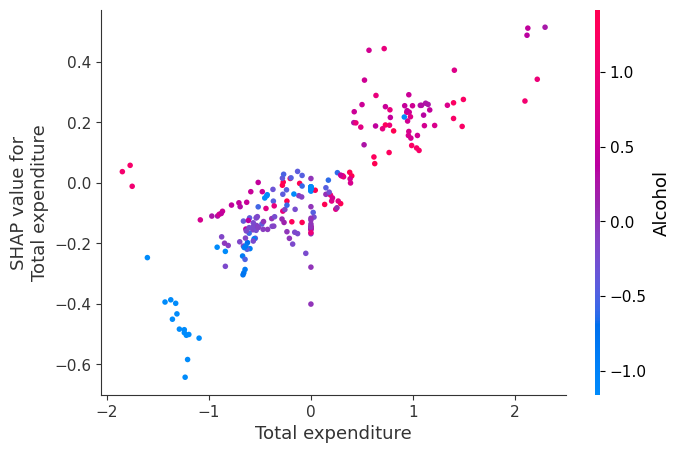

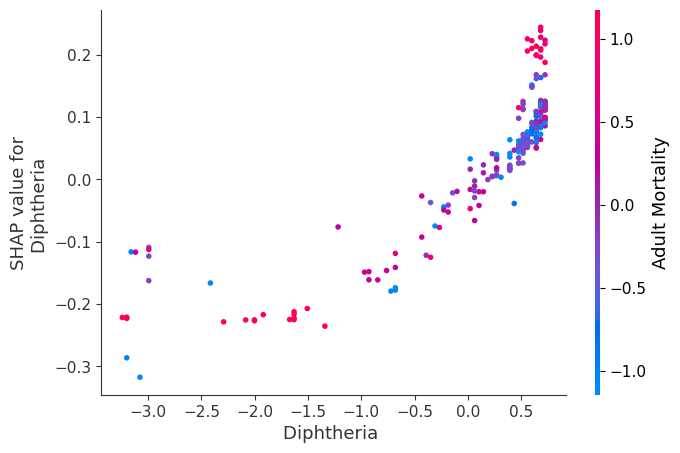

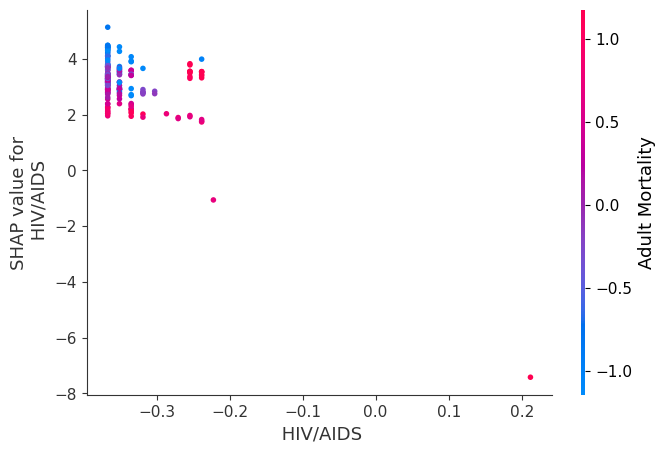

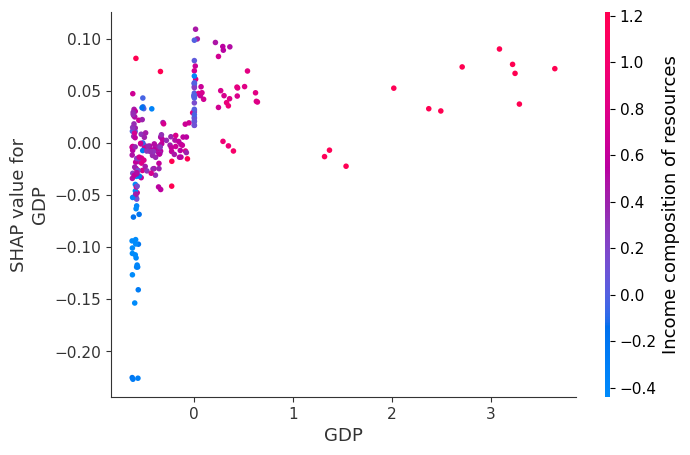

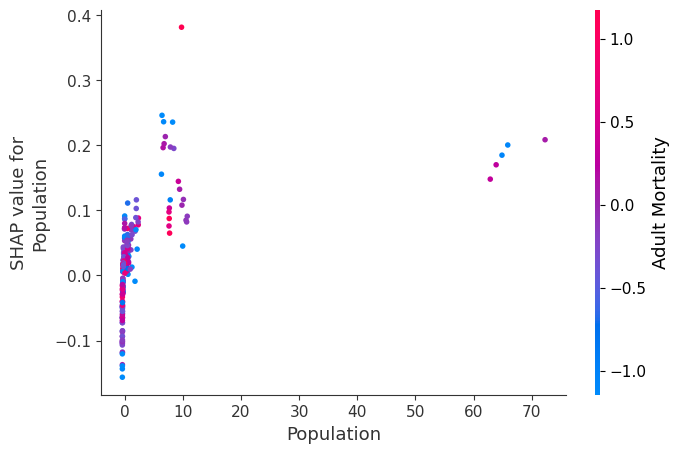

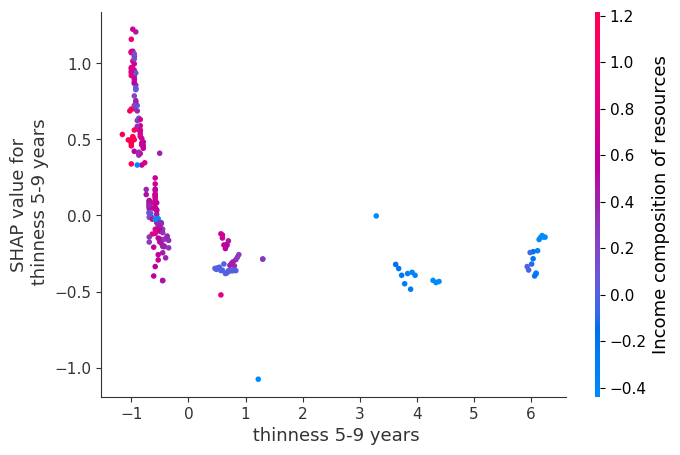

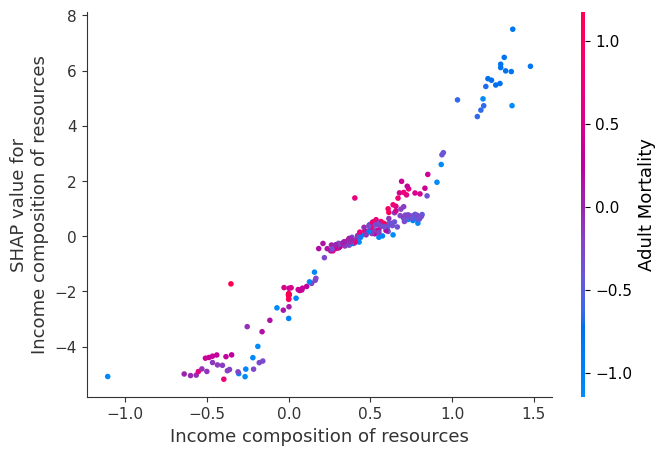

In [44]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, df_patt[X_train.columns])

### Time of execution

In [45]:
end = time.time()

In [46]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 3 minutes and 43 seconds.
